In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import postprocess
import plot
import QuasinormalMode
import spheroidal

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

2023-08-31 17:00:49.317486: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 17:00:49.462115: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 17:00:49.476446: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from importlib import reload

In [5]:
reload(postprocess)
reload(plot)
reload(QuasinormalMode)
reload(spheroidal)
from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [7]:
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch

In [15]:
ROOT_PATH = jaxqualin_path
FIT_SAVE_PATH = os.path.join(ROOT_PATH, "pickle/fits")
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")
PLOT_PATH = os.path.join(PLOT_PATH_ROOT, "paper_plots/")

In [9]:
SXSnum = "0305"
l = 2
m = 2

h, Mf, af, Level, retro = get_waveform_SXS(SXSnum, l, m)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


2023-08-31 17:01:35.628073: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


In [10]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list_list = [long_str_to_qnms("-2.2.0_2.-2.0_2.1.0_2.2.0_2.2.1_3.-2.0_3.2.0_3.3.0_4.4.0_constant", Mf, af),
                       long_str_to_qnms("-2.2.0_2.-2.0_2.1.0_2.2.0_2.2.1_3.2.0_3.3.0_4.4.0_constant", Mf, af),
                       long_str_to_qnms("2.-2.0_2.1.0_2.2.0_2.2.1_3.2.0_3.3.0_4.4.0_constant", Mf, af),
                       long_str_to_qnms("2.-2.0_2.1.0_2.2.0_2.2.1_3.2.0_3.3.0_constant", Mf, af),
                       long_str_to_qnms("2.-2.0_2.2.0_2.2.1_3.2.0_3.3.0_constant", Mf, af)]
nonconvergence_cut = False

run_string_prefix = f"SXS{SXSnum}_lm_{l}.{m}"

In [11]:
fitters = [QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = 0,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix, random_initial = True,
                            initial_num = 10) for qnm_fixed_list in qnm_fixed_list_list]

In [12]:
for fitter in fitters:
    fitter.do_fits()

reloaded fit SXS0305_lm_2.2_N_0_fix_-2.2.0_2.-2.0_2.1.0_2.2.0_2.2.1_3.-2.0_3.2.0_3.3.0_4.4.0_constant_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_0_fix_-2.2.0_2.-2.0_2.1.0_2.2.0_2.2.1_3.2.0_3.3.0_4.4.0_constant_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_0_fix_2.-2.0_2.1.0_2.2.0_2.2.1_3.2.0_3.3.0_4.4.0_constant_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_0_fix_2.-2.0_2.1.0_2.2.0_2.2.1_3.2.0_3.3.0_constant_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_0_fix_2.-2.0_2.2.0_2.2.1_3.2.0_3.3.0_constant_t0_0.0000_50.0000_501 from an old run.


In [13]:
color_dict = {"2.2.0" : 'C0',
              "2.2.1" : 'C1',
              "3.2.0" : 'C2',
              "2.-2.0" : 'C3',
              "constant" : 'C4',
              "3.3.0": 'C5',
              "2.1.0": 'C6',
              "4.4.0": 'C7',
              "3.-2.0": 'C8',
              "-2.2.0": 'C9'}

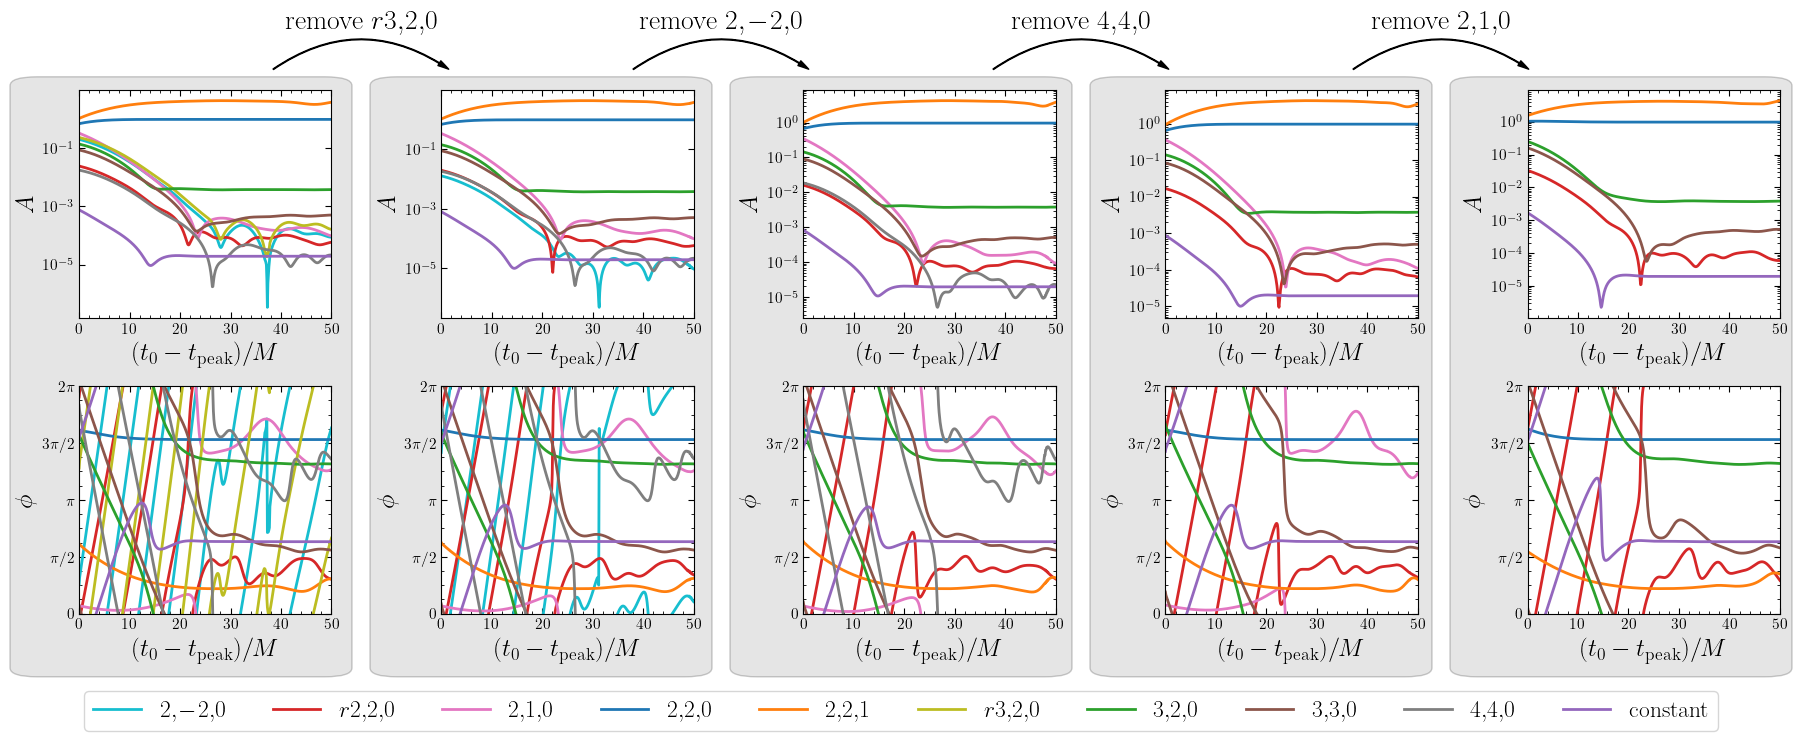

In [17]:
n_iter = 5
fig, axs = plt.subplots(2, n_iter, figsize = (18, 6))

for i, fitter in enumerate(fitters):
    result = fitter.result_full
    if i == 0:
        amp_legend = True
    else:
        amp_legend = False
    plot_amplitudes(result, fixed_modes = qnm_fixed_list_list[i], ax = axs[0, i], color_dict = color_dict, legend = amp_legend)
    plot_phases(result, fixed_modes = qnm_fixed_list_list[i], ax = axs[1, i], color_dict = color_dict, legend = False)

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'lower center', ncols = len(handles), bbox_to_anchor = (0.5, -0.11), fontsize = 17)
legend = axs[0,0].legend()
legend.remove()

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")

remove_modes_tex = [r"remove $r3{,}2{,}0$", r"remove $2{,}\! - \!2{,}0$", r"remove $4{,}4{,}0$", r"remove $2{,}1{,}0$"]

for i in range(n_iter):
    rect = FancyBboxPatch((0.005+i/n_iter, 0), 1/n_iter - 0.01, 1, facecolor="gray", edgecolor='k', boxstyle="round,pad=-0.000,rounding_size=0.015",
                    transform=fig.transFigure, zorder=-1, alpha = 0.2)
    fig.patches.append(rect)
    if i < n_iter - 1:
        a = FancyArrowPatch(((1+i)/n_iter - 0.05, 1.01), ((1+i)/n_iter + 0.05, 1.01), **kw,
                        connectionstyle="arc3,rad=-.35", 
                        transform=fig.transFigure)
        fig.patches.append(a)
        plt.figtext((1+i)/n_iter, 1.08, remove_modes_tex[i], ha = 'center', fontsize = 20)


fig.tight_layout(w_pad = 3)
plt.savefig(os.path.join(PLOT_PATH, f"SXS0305_lm_22_flatness_check.pdf"), 
            bbox_inches = 'tight')